In [2]:
#importing libraries that are required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Naming the dataset as df and importing them
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


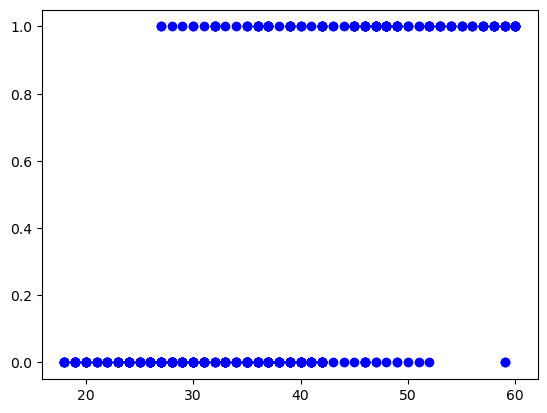

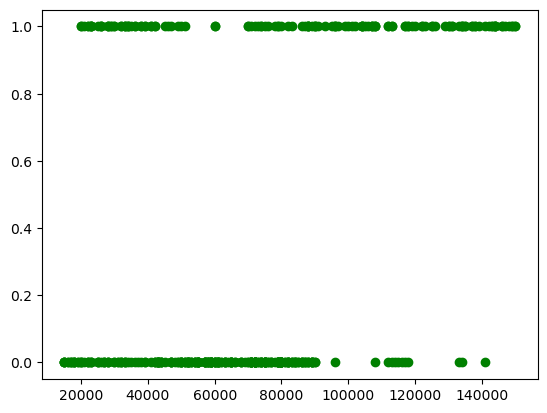

In [4]:
#Plotting the points on the graph the get accurate result
plt.scatter(df['Age'],df['Purchased'],color='blue')
plt.show()
plt.scatter(df['EstimatedSalary'],df['Purchased'],color='green')
plt.show()

In [5]:
#Implimenting logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [6]:
#After defining the dataset, now we have to split the data into two parts:
#1-Training data, 2-Testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['Age','EstimatedSalary']]
                                               ,df['Purchased'],test_size=0.2)

In [7]:
#fitting the model
model.fit(x_train,y_train)

LogisticRegression()

In [8]:
#Model performs score
model.score(x_test,y_test)

0.8

In [9]:
#this happens because the model gives higher priority to Salary in comparison of age
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
df_=df.copy()
df_[['Age']]=MMS.fit_transform(df[['Age']])
df_[['EstimatedSalary']]=MMS.fit_transform(df[['EstimatedSalary']])
df_.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,0.023810,0.029630,0
1,15810944,Male,0.404762,0.037037,0
2,15668575,Female,0.190476,0.207407,0
3,15603246,Female,0.214286,0.311111,0
4,15804002,Male,0.023810,0.451852,0


In [16]:
#Again After defining the dataset, now we have to split the data into two parts:
#1-Training data, 2-Testing data
x_train,x_test,y_train,y_test=train_test_split(df_[['Age','EstimatedSalary']],df_['Purchased'],test_size=0.2)

In [17]:
#Fitting the model
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
#Model performs score
model.score(x_test,y_test)

0.8375

In [19]:
#Making prediction on testing data
y_predicted=model.predict(x_test)

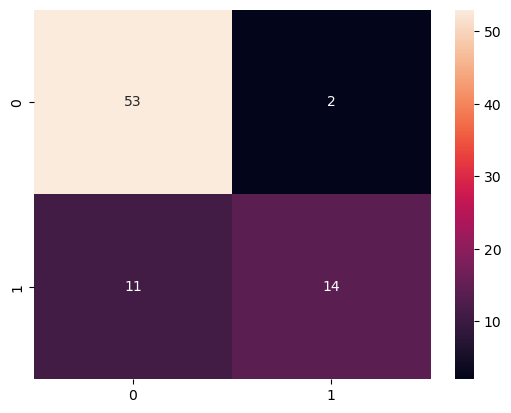

0.875 0.56 0.6829268292682927


In [21]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True)
plt.show()
print(precision_score(y_test,y_predicted),recall_score(y_test,y_predicted),
      f1_score(y_test,y_predicted))

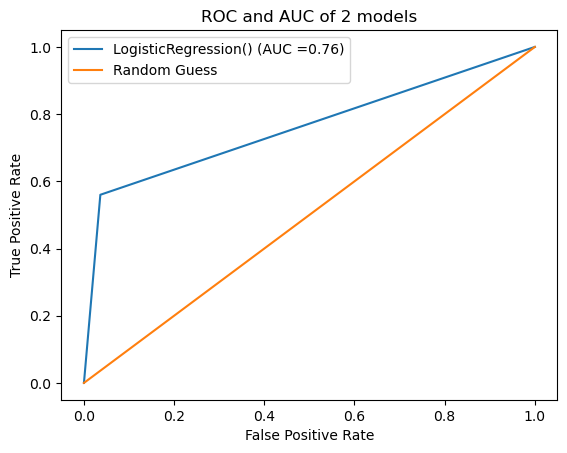

In [22]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,y_predicted)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label=f'{model} (AUC ={roc_auc:.2f})')
plt.plot([0,1],[0,1],label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title('ROC and AUC of 2 models')
plt.show()

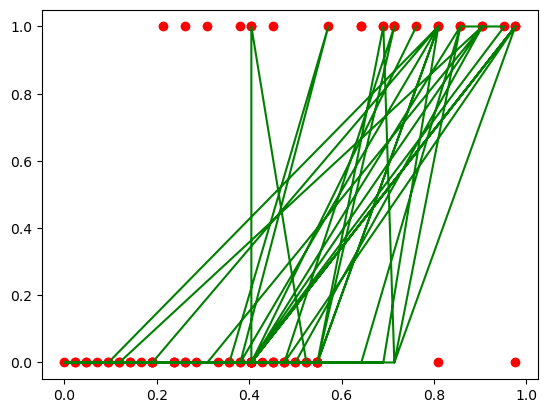

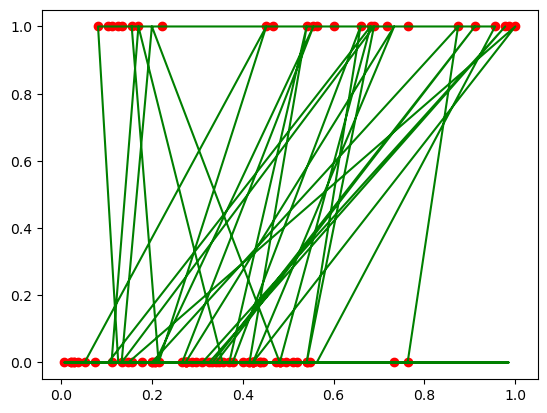

In [23]:
#
plt.scatter(x_test.iloc[:,0],y_test,color='red')
plt.plot(x_test.iloc[:,0],y_predicted,color='green')
plt.show()
plt.scatter(x_test.iloc[:,1],y_test,color='red')
plt.plot(x_test.iloc[:,1],y_predicted,color='green')
plt.show()